In [18]:
from sklearn.metrics import (
    plot_precision_recall_curve, precision_recall_curve, confusion_matrix, classification_report)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Results Analyis
results_df = pd.read_csv("output/exp40_results.csv")
#results_df = results_df.assign(pred = np.where(results_df.score > 0.5, 1, 0))
results_df

,Unnamed: 0,Label_0,Label_1,Label_2,Label_3,Label_4,y_predicted,label,mid,pid,sent_by,lang,text
0,0,0.056035,0.300820,0.499891,0.104941,0.038312,2,2,202626,3745,participant,english,Meaning of latching please Newborn skin often ...
1,1,0.022470,0.094350,0.302372,0.279988,0.300819,2,3,199398,3673,participant,swahili,Kuosha Mara tu mtoto anapozaliwa unaweza zuia ...
2,2,0.021654,0.097766,0.563080,0.230484,0.087015,2,2,200672,3701,participant,english,Thank you what about the second question? Than...
3,3,0.013404,0.049877,0.258885,0.274528,0.403305,4,3,189864,3424,participant,english,Rachuonyo sub county hospital unless otherwise...
4,4,0.004942,0.011745,0.009963,0.028168,0.945182,4,4,209192,3993,participant,english,Okay thank you for your concern please Severe ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,2332,0.012341,0.047878,0.059477,0.108553,0.771751,4,0,204535,3795,participant,english,"No Regular, strong abdominal pains are a sign ..."
2333,2333,0.029794,0.114340,0.200449,0.250711,0.404706,4,2,180561,3208,participant,swahili,Hakuna kuweka spirit. Watoto wachanga wanafaa ...
2334,2334,0.008864,0.032362,0.406623,0.209619,0.342532,2,4,38237,349,participant,swahili,nisawa Wiki hii SMS zitaacha Tafadhali kuja u...
2335,2335,0.004673,0.011704,0.010887,0.029220,0.943516,4,4,157814,2728,participant,english,Thank you We really appreciate your messages a...


<AxesSubplot: xlabel='label', ylabel='Count'>

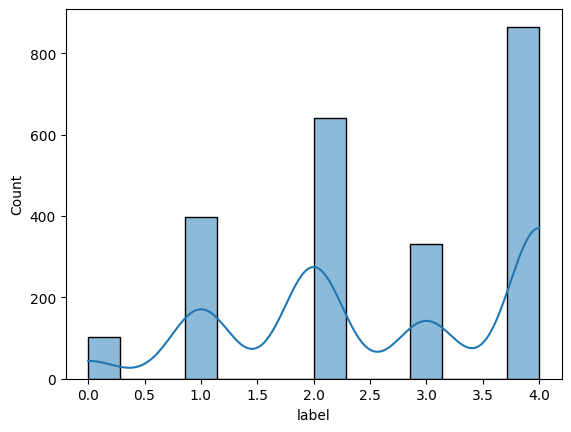

In [19]:
sns.histplot(data=results_df, x="label", kde=True)

In [6]:
pd.crosstab(results_df.label, results_df.y_predicted)

y_predicted,1,2,3,4
label,,,,
0,61,22,3,16
1,181,117,7,93
2,137,315,13,176
3,61,121,9,140
4,40,91,8,726


In [8]:
np.min(results_df.Label_0), np.max(results_df.Label_0)

(0.0044395024888217, 0.3756372332572937)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(results_df.label, results_df.y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.38      0.45      0.41       398
           2       0.47      0.49      0.48       641
           3       0.23      0.03      0.05       331
           4       0.63      0.84      0.72       865

    accuracy                           0.53      2337
   macro avg       0.34      0.36      0.33      2337
weighted avg       0.46      0.53      0.48      2337



C:\Users\nngao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nngao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nngao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [11]:
results_df_pi = results_df
results_df_pi = results_df_pi.melt(id_vars=['mid','label', 'y_predicted', 'pid', 'sent_by', 'lang', 'text'], 
                   value_vars=['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4'], var_name='variable', value_name='value')

results_df_pi

,mid,label,y_predicted,pid,sent_by,lang,text,variable,value
0,202626,2,2,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_0,0.056035
1,199398,3,2,3673,participant,swahili,Kuosha Mara tu mtoto anapozaliwa unaweza zuia ...,Label_0,0.022470
2,200672,2,2,3701,participant,english,Thank you what about the second question? Than...,Label_0,0.021654
3,189864,3,4,3424,participant,english,Rachuonyo sub county hospital unless otherwise...,Label_0,0.013404
4,209192,4,4,3993,participant,english,Okay thank you for your concern please Severe ...,Label_0,0.004942
...,...,...,...,...,...,...,...,...,...
11680,204535,0,4,3795,participant,english,"No Regular, strong abdominal pains are a sign ...",Label_4,0.771751
11681,180561,2,4,3208,participant,swahili,Hakuna kuweka spirit. Watoto wachanga wanafaa ...,Label_4,0.404706
11682,38237,4,2,349,participant,swahili,nisawa Wiki hii SMS zitaacha Tafadhali kuja u...,Label_4,0.342532
11683,157814,4,4,2728,participant,english,Thank you We really appreciate your messages a...,Label_4,0.943516


In [17]:
results_df_pi.loc[results_df_pi.mid == 202626]

,mid,label,y_predicted,pid,sent_by,lang,text,variable,value
0,202626,2,2,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_0,0.056035
2337,202626,2,2,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_1,0.300820
4674,202626,2,2,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_2,0.499891
7011,202626,2,2,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_3,0.104941
9348,202626,2,2,3745,participant,english,Meaning of latching please Newborn skin often ...,Label_4,0.038312


<AxesSubplot: xlabel='label', ylabel='value'>

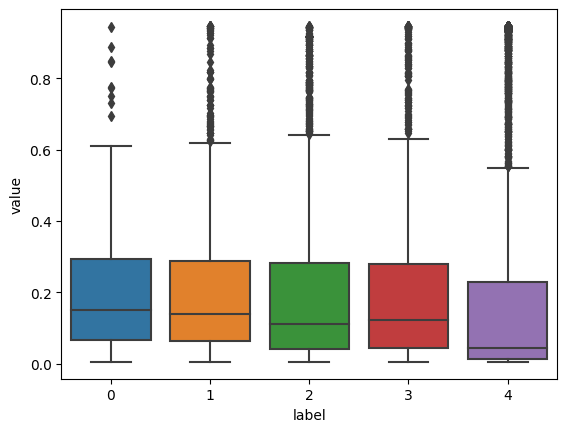

In [15]:
sns.boxplot(data=results_df_pi, x="label", y="value")

<AxesSubplot: xlabel='variable', ylabel='value'>

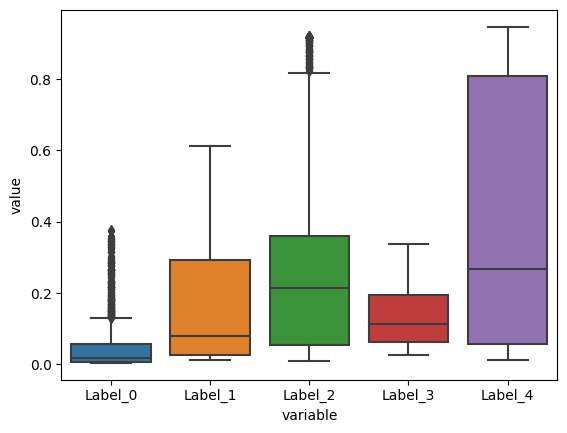

In [20]:
sns.boxplot(data=results_df_pi, x="variable", y="value")

In [21]:
results_df_pi.to_csv("output/results_df_melt.csv")

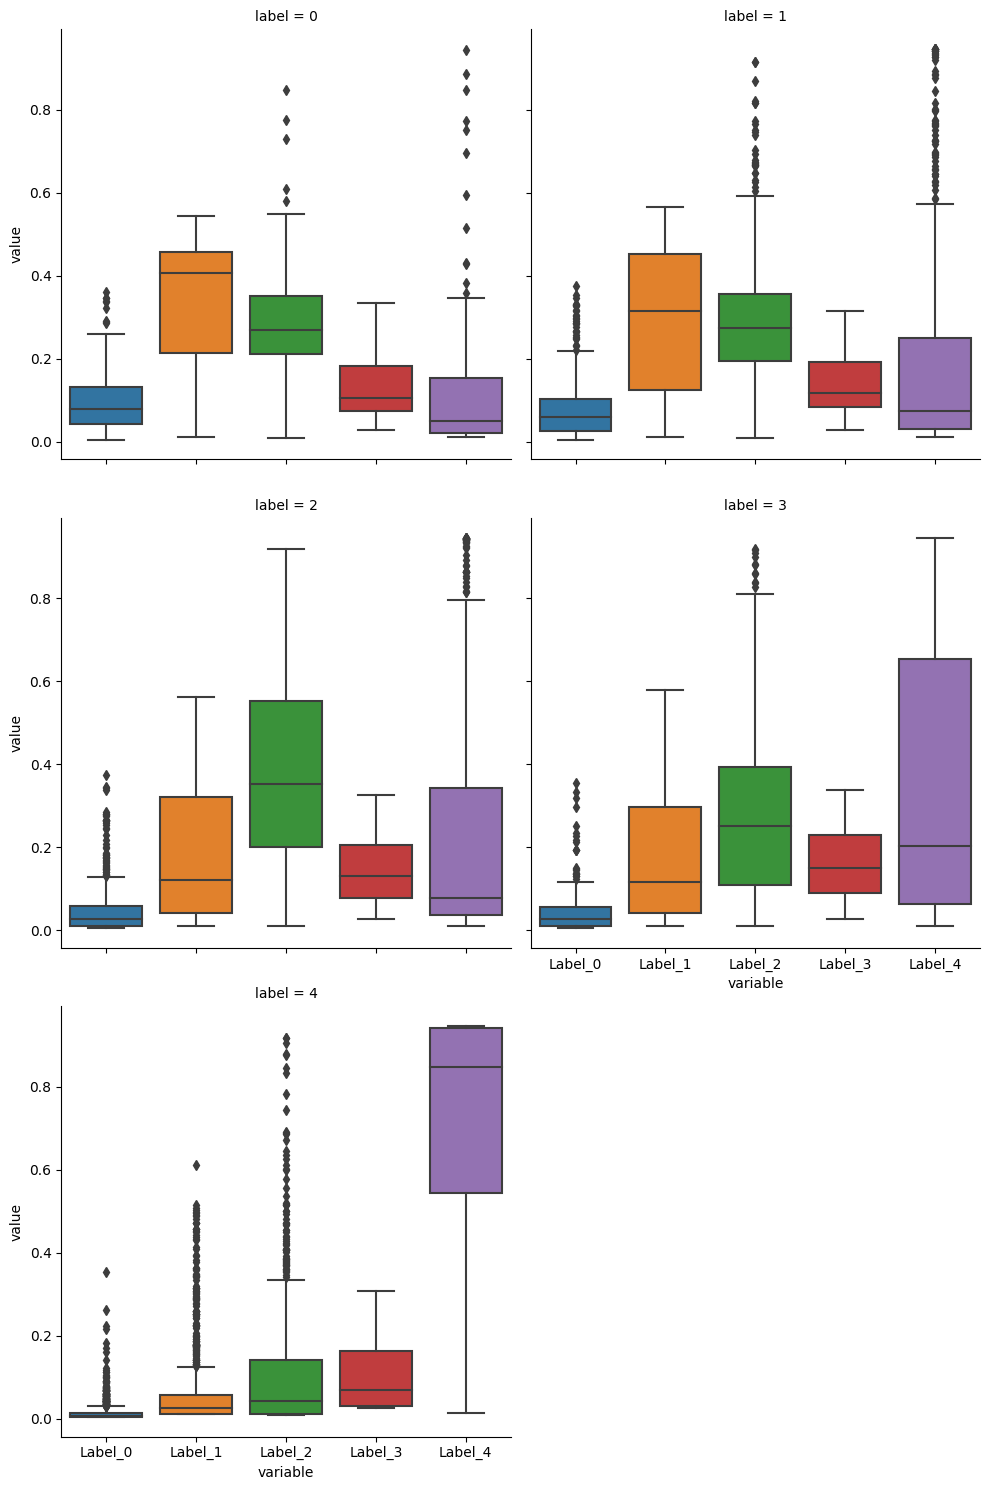

In [22]:
sns.catplot(
    data=results_df_pi, x='variable', y='value',
    col='label', kind='box', col_wrap=2
)